In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
iris = datasets.load_iris()

In [3]:
X_iris = iris.data
Y_iris = iris.target

In [4]:
Y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
x = pd.DataFrame(iris.data, columns=iris.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y = pd.DataFrame(iris.target, columns=['Target'])
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


Text(0, 0.5, 'Petal width')

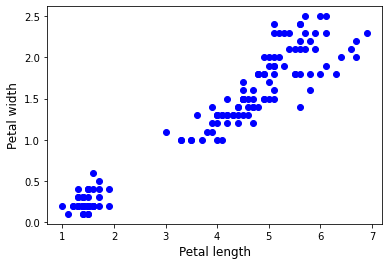

In [9]:
plt.scatter(x['petal length (cm)'],x['petal width (cm)'], c = 'blue')
plt.xlabel('Petal length',fontsize=12)
plt.ylabel('Petal width',fontsize=12)

In [10]:
model = KMeans(n_clusters=2,max_iter=1000 )


In [11]:
model.fit(x)
y_labels = model.labels_

In [12]:
y_kmeans = model.predict(x)
print('Predicciones = ', y_kmeans)

Predicciones =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [13]:
from sklearn import metrics

In [14]:
accuracy = metrics.adjusted_mutual_info_score(Y_iris, y_kmeans)
print(accuracy)

0.653838071376278


Text(0, 0.5, 'petal width')

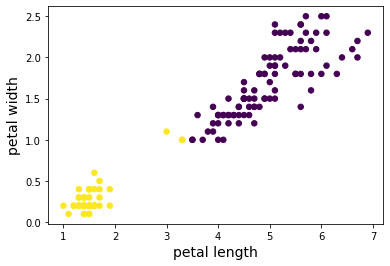

In [15]:
plt.scatter(x['petal length (cm)'],x['petal width (cm)'], c = y_kmeans, s = 30 )
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)

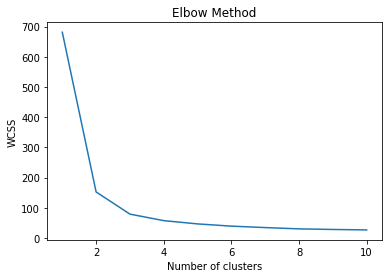

In [16]:
#Aplicando metodo del codo para calcular el K del K-means

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#entre 3 y 2

In [17]:
#probamos con 3
model = KMeans(n_clusters=3,max_iter=1000 )
model.fit(x)
y_labels = model.labels_

In [18]:
y_kmeans = model.predict(x)
print('Predicciones = ', y_kmeans)

Predicciones =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [19]:
accuracy = metrics.adjusted_mutual_info_score(Y_iris, y_kmeans)
print(accuracy)

0.7551191675800484


Text(0, 0.5, 'petal width')

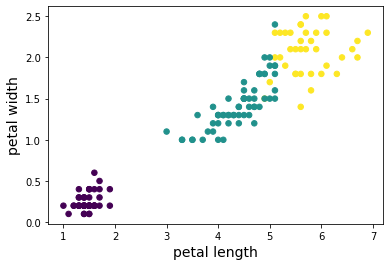

In [20]:
plt.scatter(x['petal length (cm)'],x['petal width (cm)'], c = y_kmeans, s = 30 )
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)